# DecisionTree Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_csv(r"C:\Users\ashishkumd2\Desktop\SOurcs\ML\Datsets\Credit.csv")
A.head(2)

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


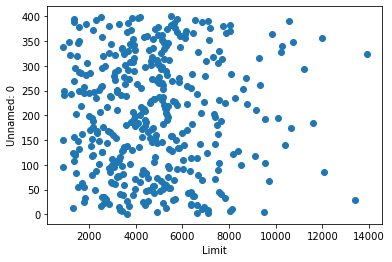

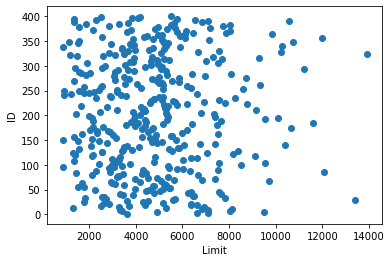

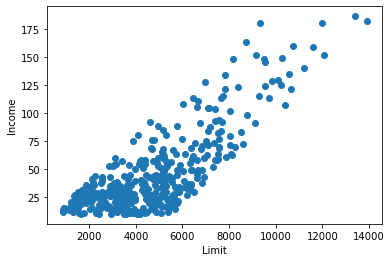

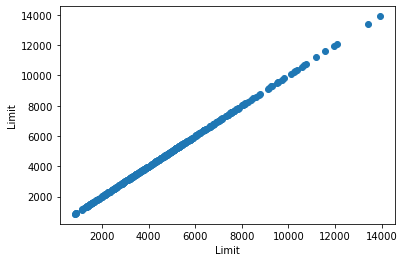

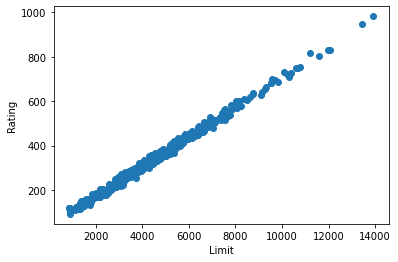

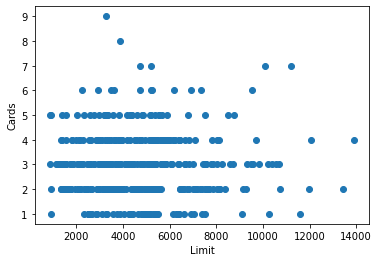

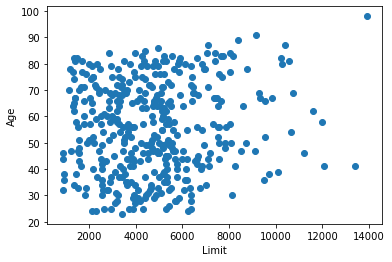

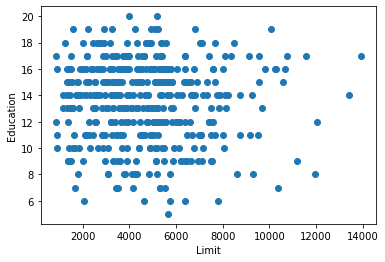

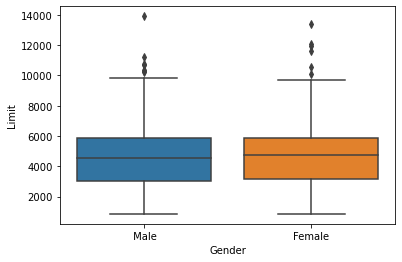

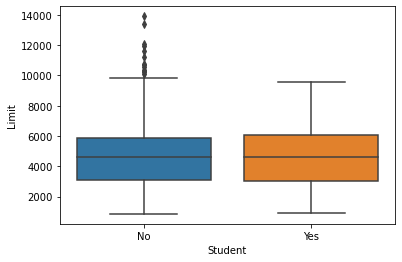

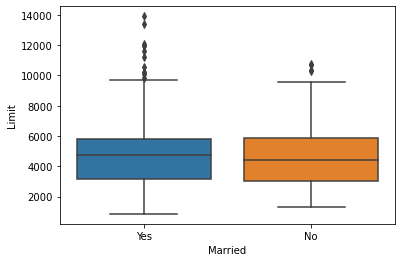

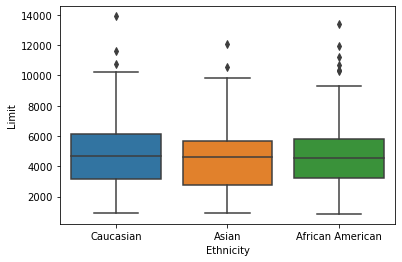

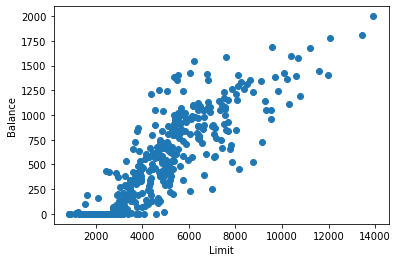

In [3]:
for i in A.columns:
    if A[i].dtypes=='object':
        sb.boxplot(A[i],A['Limit'])
        plt.show()
    else:
        plt.scatter(A['Limit'],A[i])
        plt.xlabel("Limit")
        plt.ylabel(i)
        plt.show()
            

,Income,Rating,Cards,Age,Education,Balance
0,14.891,283,2,34,11,333
1,106.025,483,3,82,15,903
2,104.593,514,4,71,11,580
3,148.924,681,3,36,11,964
4,55.882,357,2,68,16,331
...,...,...,...,...,...,...
395,12.096,307,3,32,13,560
396,13.364,296,5,65,17,480
397,57.872,321,5,67,12,138
398,37.728,192,1,44,13,0


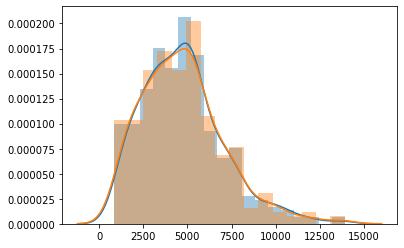

In [25]:
X = A.drop(labels=["Unnamed: 0","ID","Limit","Gender","Student","Married","Ethnicity"],axis=1)
Y = A[["Limit"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

sb.distplot(Y)
sb.distplot(ytrain)
X

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [9]:
for i in range(2,15,1):
    #dtr=DecisionTreeRegressor(max_depth=i)
    dtr = DecisionTreeRegressor(min_samples_split=i)

    model=dtr.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    MAE=mean_absolute_error(ytest,pred)
    print(MAE)
#     print(model.feature_importances_)

196.825
204.0125
199.72916666666663
206.96770833333335
217.38708333333335
216.38916666666674
212.99449404761907
210.99494047619055
211.91084325396827
223.91608630952382
217.96034406565659
213.11598529942285
210.43243829087578


In [7]:
from sklearn.model_selection import GridSearchCV

In [11]:
#tp = {"max_depth":range(2,15,1)}
tp = {"min_samples_split":range(2,15,1)}
dtr = DecisionTreeRegressor()
cv = GridSearchCV(dtr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_



{'min_samples_split': 9}

In [18]:

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=9)
model = dtr.fit(xtrain,ytrain)
pred = model.predict(xtest)
mean_absolute_error(ytest,pred)

201.66413690476188

In [24]:
model.feature_importances_
# X.columns

array([8.69216387e-04, 9.93603013e-01, 1.09433237e-03, 9.55712867e-04,
       6.30230935e-04, 2.84749417e-03])

<BarContainer object of 6 artists>

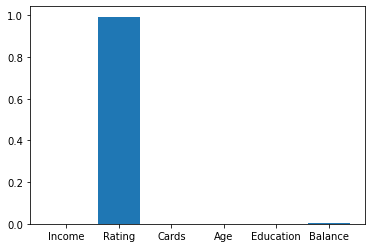

In [23]:
import matplotlib.pyplot as plt
plt.bar(X.columns,model.feature_importances_,)

In [13]:
from sklearn.tree import export_graphviz


In [14]:
export_graphviz(dtr, out_file='C:/Users/Ashish/Desktop/DataScience/abc.out')
#open a URL webgraphviz.com and paste out file contents and create tree

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Ashish/Desktop/DataScience/abc.out'

# Dection Tree Clasiifier

In [4]:

from pandas import read_csv
A=read_csv(r"C:/Users/ashishkumd2/Desktop/SOurcs/ML/Datsets/cars93.csv")



In [5]:
A.head(20)


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [7]:
Y = A[['Type']]
X = A.drop(labels=["Type","Unnamed: 0","Manufacturer","Model","Make"],axis=1)
X.columns
X

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,None,Front,5,2.5,109,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,17.6,20.0,22.4,21,30,None,Front,4,2.0,134,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,22.9,23.3,23.7,18,25,None,Front,6,2.8,178,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,21.8,22.7,23.5,21,28,Driver only,Rear,4,2.3,114,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [13]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
X

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,25,33,36,10,11,2,1,1,5,27,...,7,2,18,10,6,5,9,4,24,1
1,67,71,73,3,5,0,1,3,15,46,...,23,2,36,23,9,6,16,8,60,1
2,63,66,63,5,6,1,1,3,13,41,...,20,2,21,10,5,5,12,7,50,1
3,69,76,76,4,6,0,1,3,13,41,...,34,3,34,14,8,5,18,10,52,1
4,61,68,69,7,10,1,2,1,18,48,...,34,1,27,17,7,7,10,6,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,42,47,49,2,1,2,1,2,12,16,...,34,4,28,23,10,6,21,23,75,1
89,46,50,47,6,10,2,1,1,7,24,...,25,2,21,11,5,3,19,7,39,1
90,60,57,51,3,5,2,1,3,13,42,...,25,1,3,5,4,4,8,8,28,1
91,57,56,50,6,8,1,2,1,10,18,...,15,2,31,12,5,5,15,7,39,1


In [5]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)


In [6]:


       from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=30)
model = dtc.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

print(accuracy_score(ytest,pred))
#print(confusion_matrix(ytest,pred))



0.8421052631578947


In [7]:
list(zip(X.columns,range(0,22,1)))


[('Min.Price', 0),
 ('Price', 1),
 ('Max.Price', 2),
 ('MPG.city', 3),
 ('MPG.highway', 4),
 ('AirBags', 5),
 ('DriveTrain', 6),
 ('Cylinders', 7),
 ('EngineSize', 8),
 ('Horsepower', 9),
 ('RPM', 10),
 ('Rev.per.mile', 11),
 ('Man.trans.avail', 12),
 ('Fuel.tank.capacity', 13),
 ('Passengers', 14),
 ('Length', 15),
 ('Wheelbase', 16),
 ('Width', 17),
 ('Turn.circle', 18),
 ('Rear.seat.room', 19),
 ('Luggage.room', 20),
 ('Weight', 21)]

In [8]:

for i in range(2,20,1):
   from sklearn.tree import DecisionTreeClassifier
   dtc = DecisionTreeClassifier(criterion="entropy",random_state=30,max_depth=i)
   model = dtc.fit(xtrain,ytrain)
   pred = model.predict(xtest)

   from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

   print(i,accuracy_score(ytest,pred))
#print(confusion_matrix(ytest,pred))


2 0.631578947368421
3 0.7894736842105263
4 0.8421052631578947
5 0.8421052631578947
6 0.8421052631578947
7 0.8421052631578947
8 0.8421052631578947
9 0.8421052631578947
10 0.8421052631578947
11 0.8421052631578947
12 0.8421052631578947
13 0.8421052631578947
14 0.8421052631578947
15 0.8421052631578947
16 0.8421052631578947
17 0.8421052631578947
18 0.8421052631578947
19 0.8421052631578947


# REGRESSION 

In [6]:

from pandas import read_csv
A=pd.read_csv("C:/Users/Ashish/Desktop/DataScience/Datasets/cars93.csv")



ImportError: Missing required dependencies ['numpy']

In [4]:

Y = A[["Price"]]
X = A.drop(labels=["Unnamed: 0","Manufacturer","Model","Make","Price"],axis = 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)



In [8]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=30)

model = rfr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error,accuracy_score
print("%.3f"%mean_squared_error(ytest,pred))
#print("%.3f"%accuracy_score(ytest,pred))



C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.643


In [9]:

rfr = RandomForestRegressor(random_state=30,max_depth=4)
tp = {"n_estimators":range(39,50,1)}
cv = GridSearchCV(rfr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
ntrees = cvmodel.best_params_["n_estimators"]

rfr = RandomForestRegressor(random_state=30,max_depth=4,n_estimators=ntrees)
model = rfr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
print("%.3f"%mean_squared_error(ytest,pred))


C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\mod

C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\mod

0.982


In [10]:

for i in range(2,50,1):
   rfr = RandomForestRegressor(random_state=30,max_depth=4,n_estimators=i)
   model = rfr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   from sklearn.metrics import mean_squared_error
   print(i,"%.3f"%mean_squared_error(ytest,pred))


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversio

2 2.170
3 2.092
4 1.072
5 0.832
6 0.886
7 0.485
8 0.834
9 1.147
10 0.849


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversio

11 0.696
12 0.930
13 0.830
14 0.749


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversio

15 0.739
16 0.732
17 0.807
18

C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 0.683
19 0.634
20 0.725
21 0.828


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversio

22 0.793
23 0.727
24 0.651


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


25 0.632
26 0.639
27 0.693


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


28 0.711
29 0.725
30 0.667


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


31 0.701
32 0.753
33 0.825


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


34 0.760
35 0.817
36

C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 0.771
37 0.815
38

C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 0.882
39 0.825


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


40 0.792
41 0.775


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


42 0.866
43 0.920


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


44 0.998
45 0.931


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


46 0.964
47 0.917


C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


48 0.982
49 0.925
